# Multi-Level Wavlet Compression In Python

## Demo and Test Notebook

------------------------------------------------------------------------

Artash Nath, Pay-Elec UTAT

3 Febuary 2021

------------------------------------------------------------------------

In [1]:
# Importing Neccesary Libaries

import pywt # For wavlets
import numpy # Handling Array Data
import numpy as np # ^
from PIL import Image # Image Operations
import cv2 # More Image Operations
import matplotlib.pyplot as plt # Plots and displays
from skimage.io import imread # Even more image operations

In [2]:
# Calculate pixel simmilarity between 2 arrays of same size

def image_simmilarity(imageA, imageB):
    
    imageA = imageA.astype(np.float32)
    imageB = imageB.astype(np.float32)
    
    diff = abs(imageA - imageB) # Find difference between 2 images
    
    err = diff.mean() # Calculate Average Difference between those 2 images
    
    return err


# This function graphs the number of pixels in an image lower then a value n, 
# where n ranged from pixel value 0 to 6 in the first plot, and 0 to 600 in the second plot
def pixel_thresholds(im, color='black'):
    
    g1_thresholds = np.linspace(0, 5, 100)
    g2_thresholds = np.linspace(0, 600, 1200)
    
    g1_percentages = []
    g2_percentages = []
    
    for i in g1_thresholds:
        g1_percentages.append((abs(im)<i).sum()/(im.size)*100) # Appends number of pixel in image below "i"
        
    for i in g2_thresholds:
        g2_percentages.append((abs(im)<i).sum()/(im.size)*100)
        
        
    ################################
    plt.figure(figsize=(18, 8))    
    
    plt.subplot(211)
    plt.title("(%) Of Values in Image Below [threshold]")
    plt.ylabel("(%) Pixels Below Threshold")
    plt.plot(g1_thresholds,  g1_percentages, color=color)

    plt.subplot(212)
    plt.ylabel("(%) Pixels Below Threshold")
    plt.xlabel("Threshold")
    plt.plot(g2_thresholds,  g2_percentages,color=color)
    
    
# this function returns a threshold, where all pixels below that threshold should be discareded
# based on the percentage of pixels we want to discard (compression_level)

def get_threshold(im, compression_level):
    thresh = np.sort(abs((im.ravel())))[int(im.size*(1-compression_level))]
    return thresh

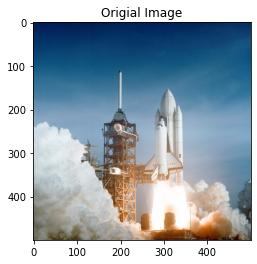

In [3]:
im = cv2.resize(imread('rocket.jpg')[:1000, :1000], (500,500) )# Read Sample Image
plt.title("Origial Image")
plt.imshow(im)

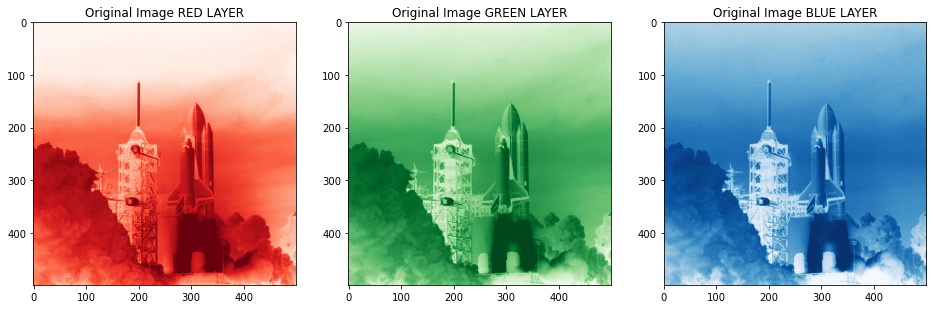

In [4]:

# Breaking into RED, GREEN, BLUE
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]


################################
plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title("Original Image RED LAYER")
plt.imshow(r,  cmap='Reds')

plt.subplot(132)
plt.title("Original Image GREEN LAYER")
plt.imshow(g, cmap = 'Greens')

plt.subplot(133)
plt.title("Original Image BLUE LAYER")
plt.imshow(b, cmap = 'Blues')

-----------------------------------------------------
# LEVEL 1 COMPRESSION
-----------------------------------------------------

-----------------------------------------------------
###  (0% Compression)
-----------------------------------------------------

In [5]:
# Compressing Each Layer via Wavelet DB2 Periodization at Level 1
level = 1
r_coeff = pywt.wavedec2(r, 'db2', mode='periodization', level=level)
g_coeff = pywt.wavedec2(g, 'db2', mode='periodization', level=level)
b_coeff = pywt.wavedec2(b, 'db2', mode='periodization', level=level)

arr_r, slices_r = pywt.coeffs_to_array(r_coeff)
arr_g, slices_g = pywt.coeffs_to_array(g_coeff)
arr_b, slices_b = pywt.coeffs_to_array(b_coeff)


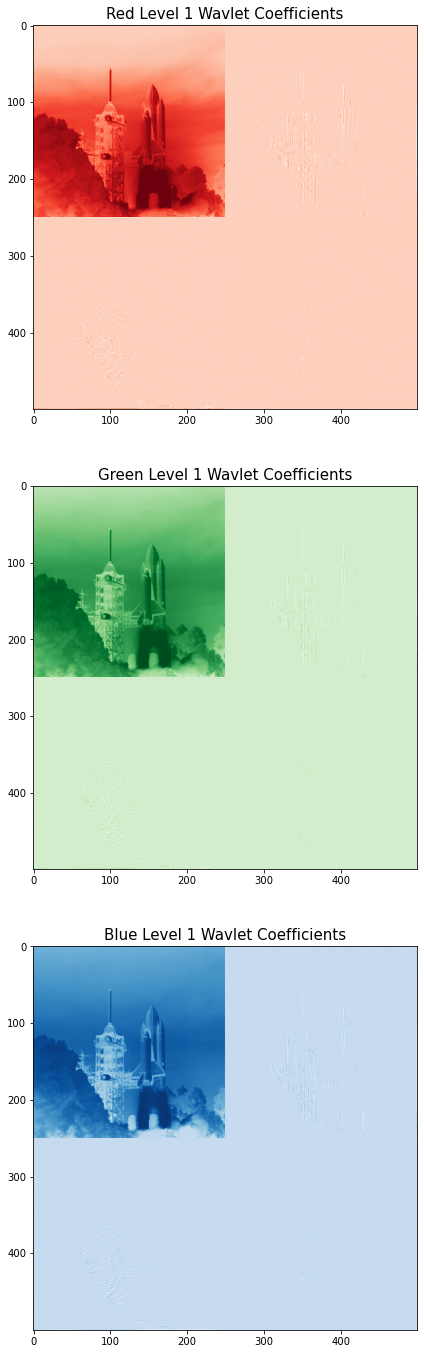

In [6]:
plt.figure(figsize=(8,24))

plt.subplot(311)
plt.title("Red Level 1 Wavlet Coefficients", fontsize=15)
plt.imshow(arr_r, cmap='Reds')

plt.subplot(312)
plt.title("Green Level 1 Wavlet Coefficients",  fontsize=15)
plt.imshow(arr_g, cmap='Greens')

plt.subplot(313)
plt.title("Blue Level 1 Wavlet Coefficients", fontsize=15)
plt.imshow(arr_b, cmap='Blues')

In [7]:
r_coeff = pywt.array_to_coeffs(arr_r, slices_r, output_format='wavedecn')
g_coeff = pywt.array_to_coeffs(arr_g, slices_g, output_format='wavedecn')
b_coeff = pywt.array_to_coeffs(arr_b, slices_b, output_format='wavedecn')

In [8]:
level = 1

r_reconstructed = pywt.waverecn(r_coeff, 'db2', mode='periodization')
g_reconstructed = pywt.waverecn(g_coeff, 'db2', mode='periodization')
b_reconstructed = pywt.waverecn(b_coeff, 'db2', mode='periodization')

reconstructed_im = (np.stack((r_reconstructed, g_reconstructed, b_reconstructed), 2)).astype(np.uint16)

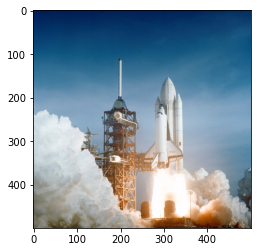

In [9]:
plt.imshow(reconstructed_im)

In [10]:
print("Average Pixel Difference Between Original and Wavlet Reconstructed with 100% Compression: ",image_simmilarity(im, reconstructed_im))

Average Pixel Difference Between Original and Wavlet Reconstructed with 100% Compression:  0.05488533


-----------------------------------------------------
###  (n% Compression)
-----------------------------------------------------

In [11]:
# Compressing Each Layer via Wavelet DB2 Periodization at Level 1
level = 1
r_coeff = pywt.wavedec2(r, 'db2', mode='periodization', level=level)
g_coeff = pywt.wavedec2(g, 'db2', mode='periodization', level=level)
b_coeff = pywt.wavedec2(b, 'db2', mode='periodization', level=level)

arr_r, slices_r = pywt.coeffs_to_array(r_coeff)
arr_g, slices_g = pywt.coeffs_to_array(g_coeff)
arr_b, slices_b = pywt.coeffs_to_array(b_coeff)

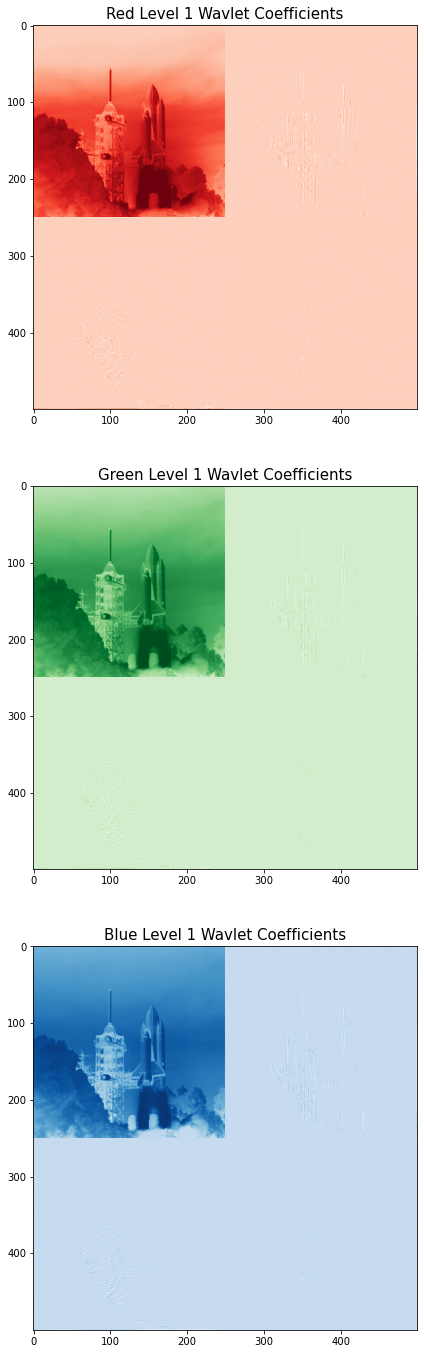

In [12]:
plt.figure(figsize=(8,24))

plt.subplot(311)
plt.title("Red Level 1 Wavlet Coefficients", fontsize=15)
plt.imshow(arr_r, cmap='Reds')

plt.subplot(312)
plt.title("Green Level 1 Wavlet Coefficients",  fontsize=15)
plt.imshow(arr_g, cmap='Greens')

plt.subplot(313)
plt.title("Blue Level 1 Wavlet Coefficients", fontsize=15)
plt.imshow(arr_b, cmap='Blues')

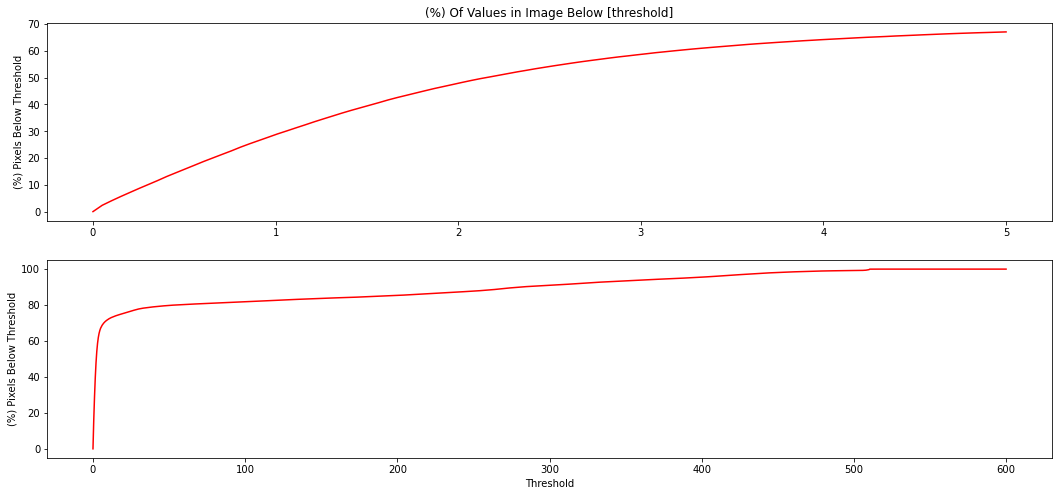

In [13]:
pixel_thresholds(arr_r, color='r')

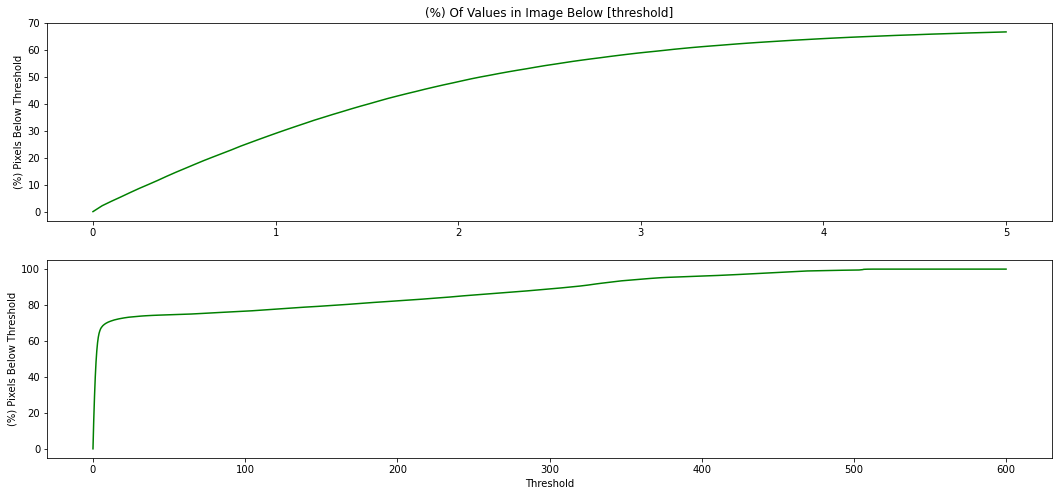

In [14]:
pixel_thresholds(arr_g, color='g')

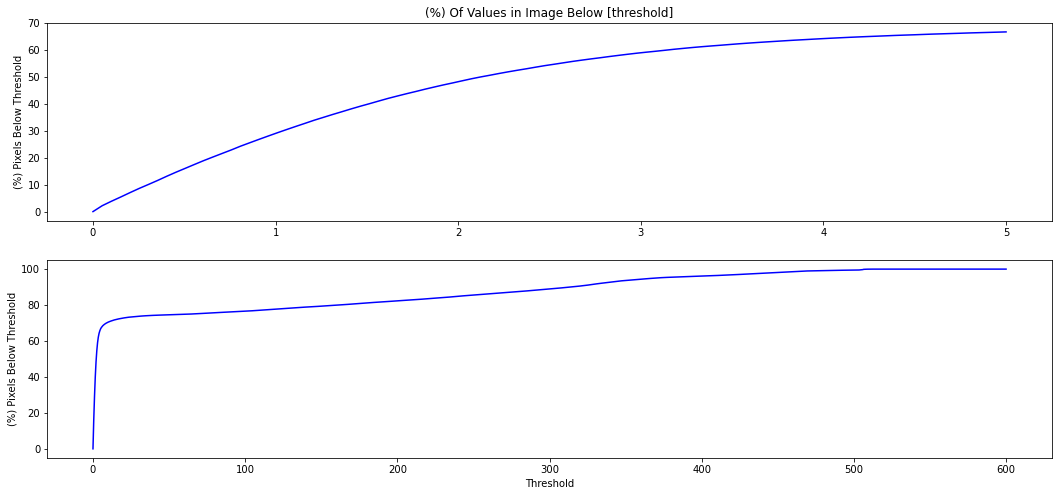

In [15]:
pixel_thresholds(arr_g, color='b')

-----------------------------------------------------
###  (50% Compression)
-----------------------------------------------------

In [16]:
threshold_r = get_threshold(arr_r, 0.5)
threshold_g = get_threshold(arr_g, 0.5)
threshold_b = get_threshold(arr_b, 0.5)

In [17]:
arr_r_compressed50 = arr_r * (abs(arr_r) > (threshold_r))
arr_g_compressed50 = arr_g * (abs(arr_g) > (threshold_g))
arr_b_compressed50 = arr_b * (abs(arr_b) > (threshold_b))

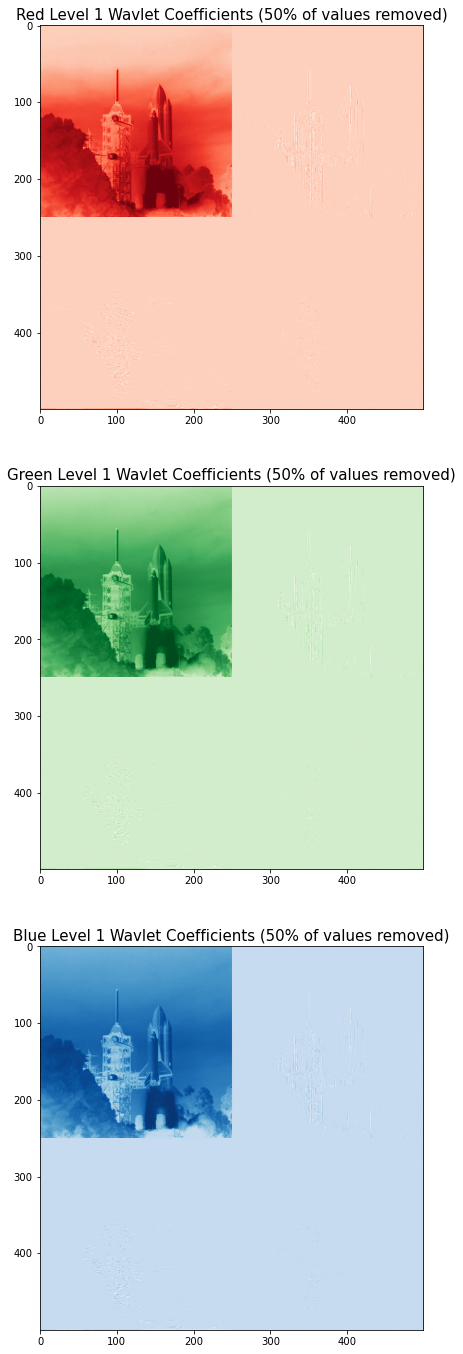

In [18]:
plt.figure(figsize=(8,24))

plt.subplot(311)
plt.title("Red Level 1 Wavlet Coefficients (50% of values removed)", fontsize=15)
plt.imshow(arr_r_compressed50, cmap='Reds')

plt.subplot(312)
plt.title("Green Level 1 Wavlet Coefficients (50% of values removed)",  fontsize=15)
plt.imshow(arr_g_compressed50, cmap='Greens')

plt.subplot(313)
plt.title("Blue Level 1 Wavlet Coefficients (50% of values removed)", fontsize=15)
plt.imshow(arr_b_compressed50, cmap='Blues')

In [19]:
r_coeff = pywt.array_to_coeffs(arr_r_compressed50, slices_r, output_format='wavedecn')
g_coeff = pywt.array_to_coeffs(arr_g_compressed50, slices_g, output_format='wavedecn')
b_coeff = pywt.array_to_coeffs(arr_b_compressed50, slices_b, output_format='wavedecn')

In [26]:
level = 1

r_reconstructed = pywt.waverecn(r_coeff, 'db2', mode='periodization').astype(np.uint8)
g_reconstructed = pywt.waverecn(g_coeff, 'db2', mode='periodization').astype(np.uint8)
b_reconstructed = pywt.waverecn(b_coeff, 'db2', mode='periodization').astype(np.uint8)

reconstructed_im = (np.stack((r_reconstructed, g_reconstructed, b_reconstructed), 2)).astype(np.uint8)

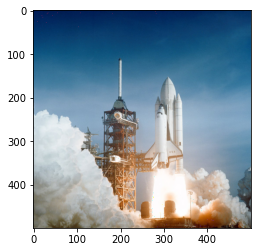

In [27]:
plt.imshow(reconstructed_im)

In [22]:
print("Average Pixel Difference Between Original and Wavlet Reconstructed with 50% Compression: ",image_simmilarity(im, reconstructed_im))

Average Pixel Difference Between Original and Wavlet Reconstructed with 50% Compression:  0.71933335
